## 🏨 Hotel Review Sentiment Analysis using NLP 

### Import required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [5]:
# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###   Load dataset

In [6]:
data = pd.read_excel('hotel_reviews.xlsx')
print("Dataset loaded successfully.")

# Display first few rows
data.head()

Dataset loaded successfully.


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


> ### EDA  'EXP'

In [7]:

# Shape of dataset (rows, columns)
print("Dataset shape:", data.shape)

Dataset shape: (20491, 2)


In [8]:
# Summary of dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None
             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [9]:

# Check for missing values
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [10]:
# Remove duplicate entries
data.drop_duplicates(inplace=True)
print("\nAfter removing duplicates, dataset shape:", data.shape)


After removing duplicates, dataset shape: (20491, 2)


In [11]:
# Feature Engineering: Character count, word count, and unique word count
data['Char_count'] = data['Review'].astype(str).apply(len)  # Character count
data['Word_count'] = data['Review'].astype(str).apply(lambda x: len(x.split()))  # Word count
data['Unique_Word_count'] = data['Review'].astype(str).apply(lambda x: len(set(x.split())))  # Unique word count

C:\Users\praja\AppData\Local\Temp\ipykernel_12208\4118697815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=data, palette='coolwarm')


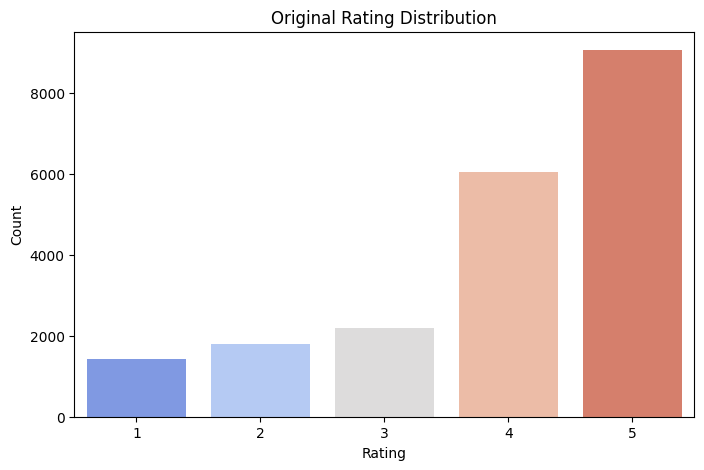

In [12]:
# Visualizing rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=data, palette='coolwarm')
plt.title('Original Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [13]:
# Convert ratings to binary (Positive: 1 if >=4, Negative: 0 otherwise)
def Rating_label(rating):
    if rating >= 4:
        return "positive"
    elif rating > 2 and rating < 4:
        return "neutral"
    else:
        return "negative"

data['Sentiment'] = data['Rating'].apply(Rating_label)


C:\Users\praja\AppData\Local\Temp\ipykernel_12208\2192472018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Sentiment'], palette='coolwarm')


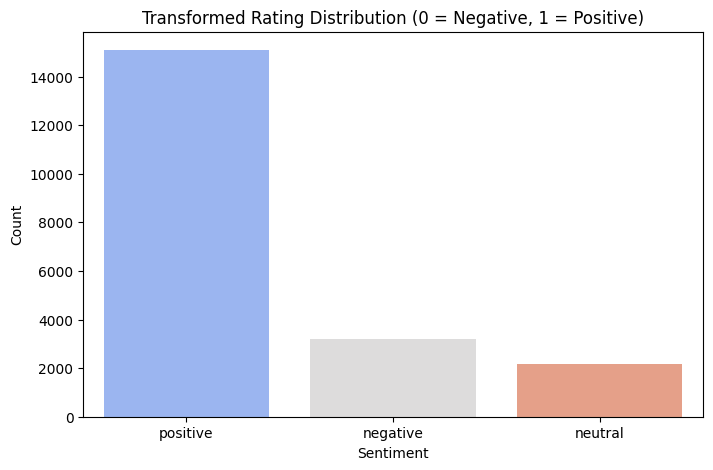

In [14]:
# Plot new rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x=data['Sentiment'], palette='coolwarm')
plt.title("Transformed Rating Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
# Encode sentiment labels numerically (Negative=0, Neutral=1, Positive=2)
label_encoder = LabelEncoder()
data['Sentiment_Encoded'] = label_encoder.fit_transform(data['Sentiment'])

data.head()

,Review,Rating,Char_count,Word_count,Unique_Word_count,Sentiment,Sentiment_Encoded
0,nice hotel expensive parking got good deal sta...,4,593,87,77,positive,2
1,ok nothing special charge diamond member hilto...,2,1689,250,188,negative,0
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,161,neutral,1
3,"unique, great stay, wonderful time hotel monac...",5,600,89,75,positive,2
4,"great stay great stay, went seahawk game aweso...",5,1281,191,160,positive,2


In [16]:
ps = PorterStemmer()
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
                    'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't"}

stop_words = set(stopwords.words("english")) - custom_stopwords

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))  # remove non-alphabetic chars
    text = text.lower()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

data['Cleaned_Review'] = data['Review'].apply(clean_text)


In [17]:
# 
from collections import Counter

# Tokenize cleaned reviews
def get_top_words(sentiment_label, n=20):
    words = ' '.join(data[data['Sentiment'] == sentiment_label]['Cleaned_Review']).split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

C:\Users\praja\AppData\Local\Temp\ipykernel_12208\2063055512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts, y=pos_words, palette='Greens_r')


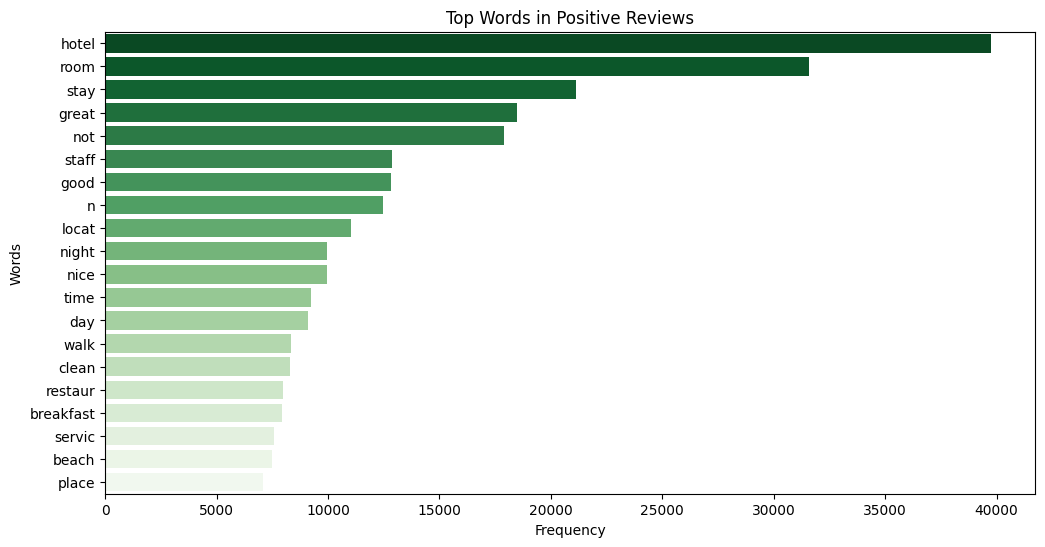

C:\Users\praja\AppData\Local\Temp\ipykernel_12208\2063055512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neu_counts, y=neu_words, palette='Blues_r')


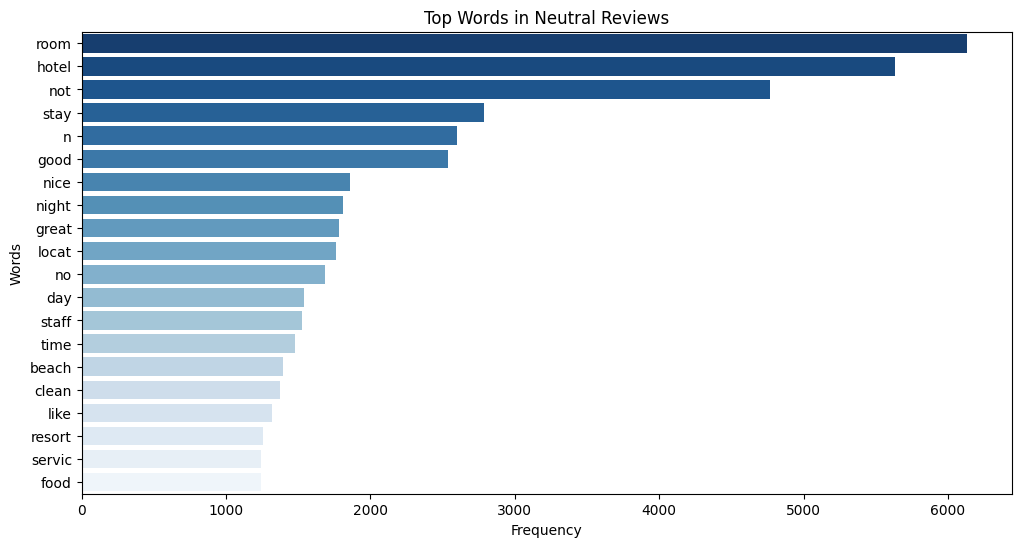

C:\Users\praja\AppData\Local\Temp\ipykernel_12208\2063055512.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_counts, y=neg_words, palette='Reds_r')


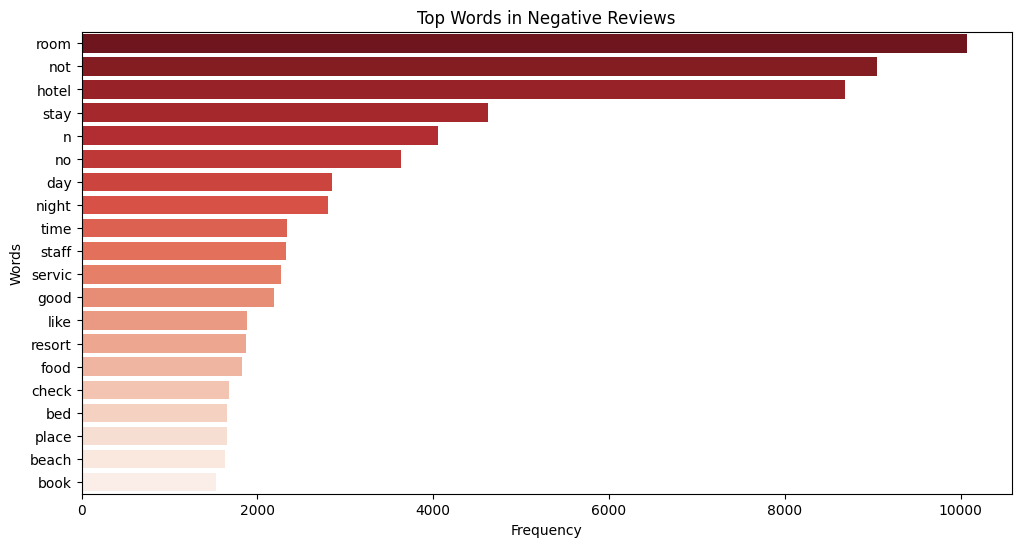

In [18]:
# Visualizing the cleaned reviews

# Top words
top_pos = get_top_words('positive')
top_neu = get_top_words('neutral')
top_neg = get_top_words('negative')

# Plot top words for positive reviews
pos_words, pos_counts = zip(*top_pos)
plt.figure(figsize=(12,6))
sns.barplot(x=pos_counts, y=pos_words, palette='Greens_r')
plt.title("Top Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot top words for neutal reviews
neu_words, neu_counts = zip(*top_neu)
plt.figure(figsize=(12,6))
sns.barplot(x=neu_counts, y=neu_words, palette='Blues_r')
plt.title("Top Words in Neutral Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot top words for negative reviews
neg_words, neg_counts = zip(*top_neg)
plt.figure(figsize=(12,6))
sns.barplot(x=neg_counts, y=neg_words, palette='Reds_r')
plt.title("Top Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


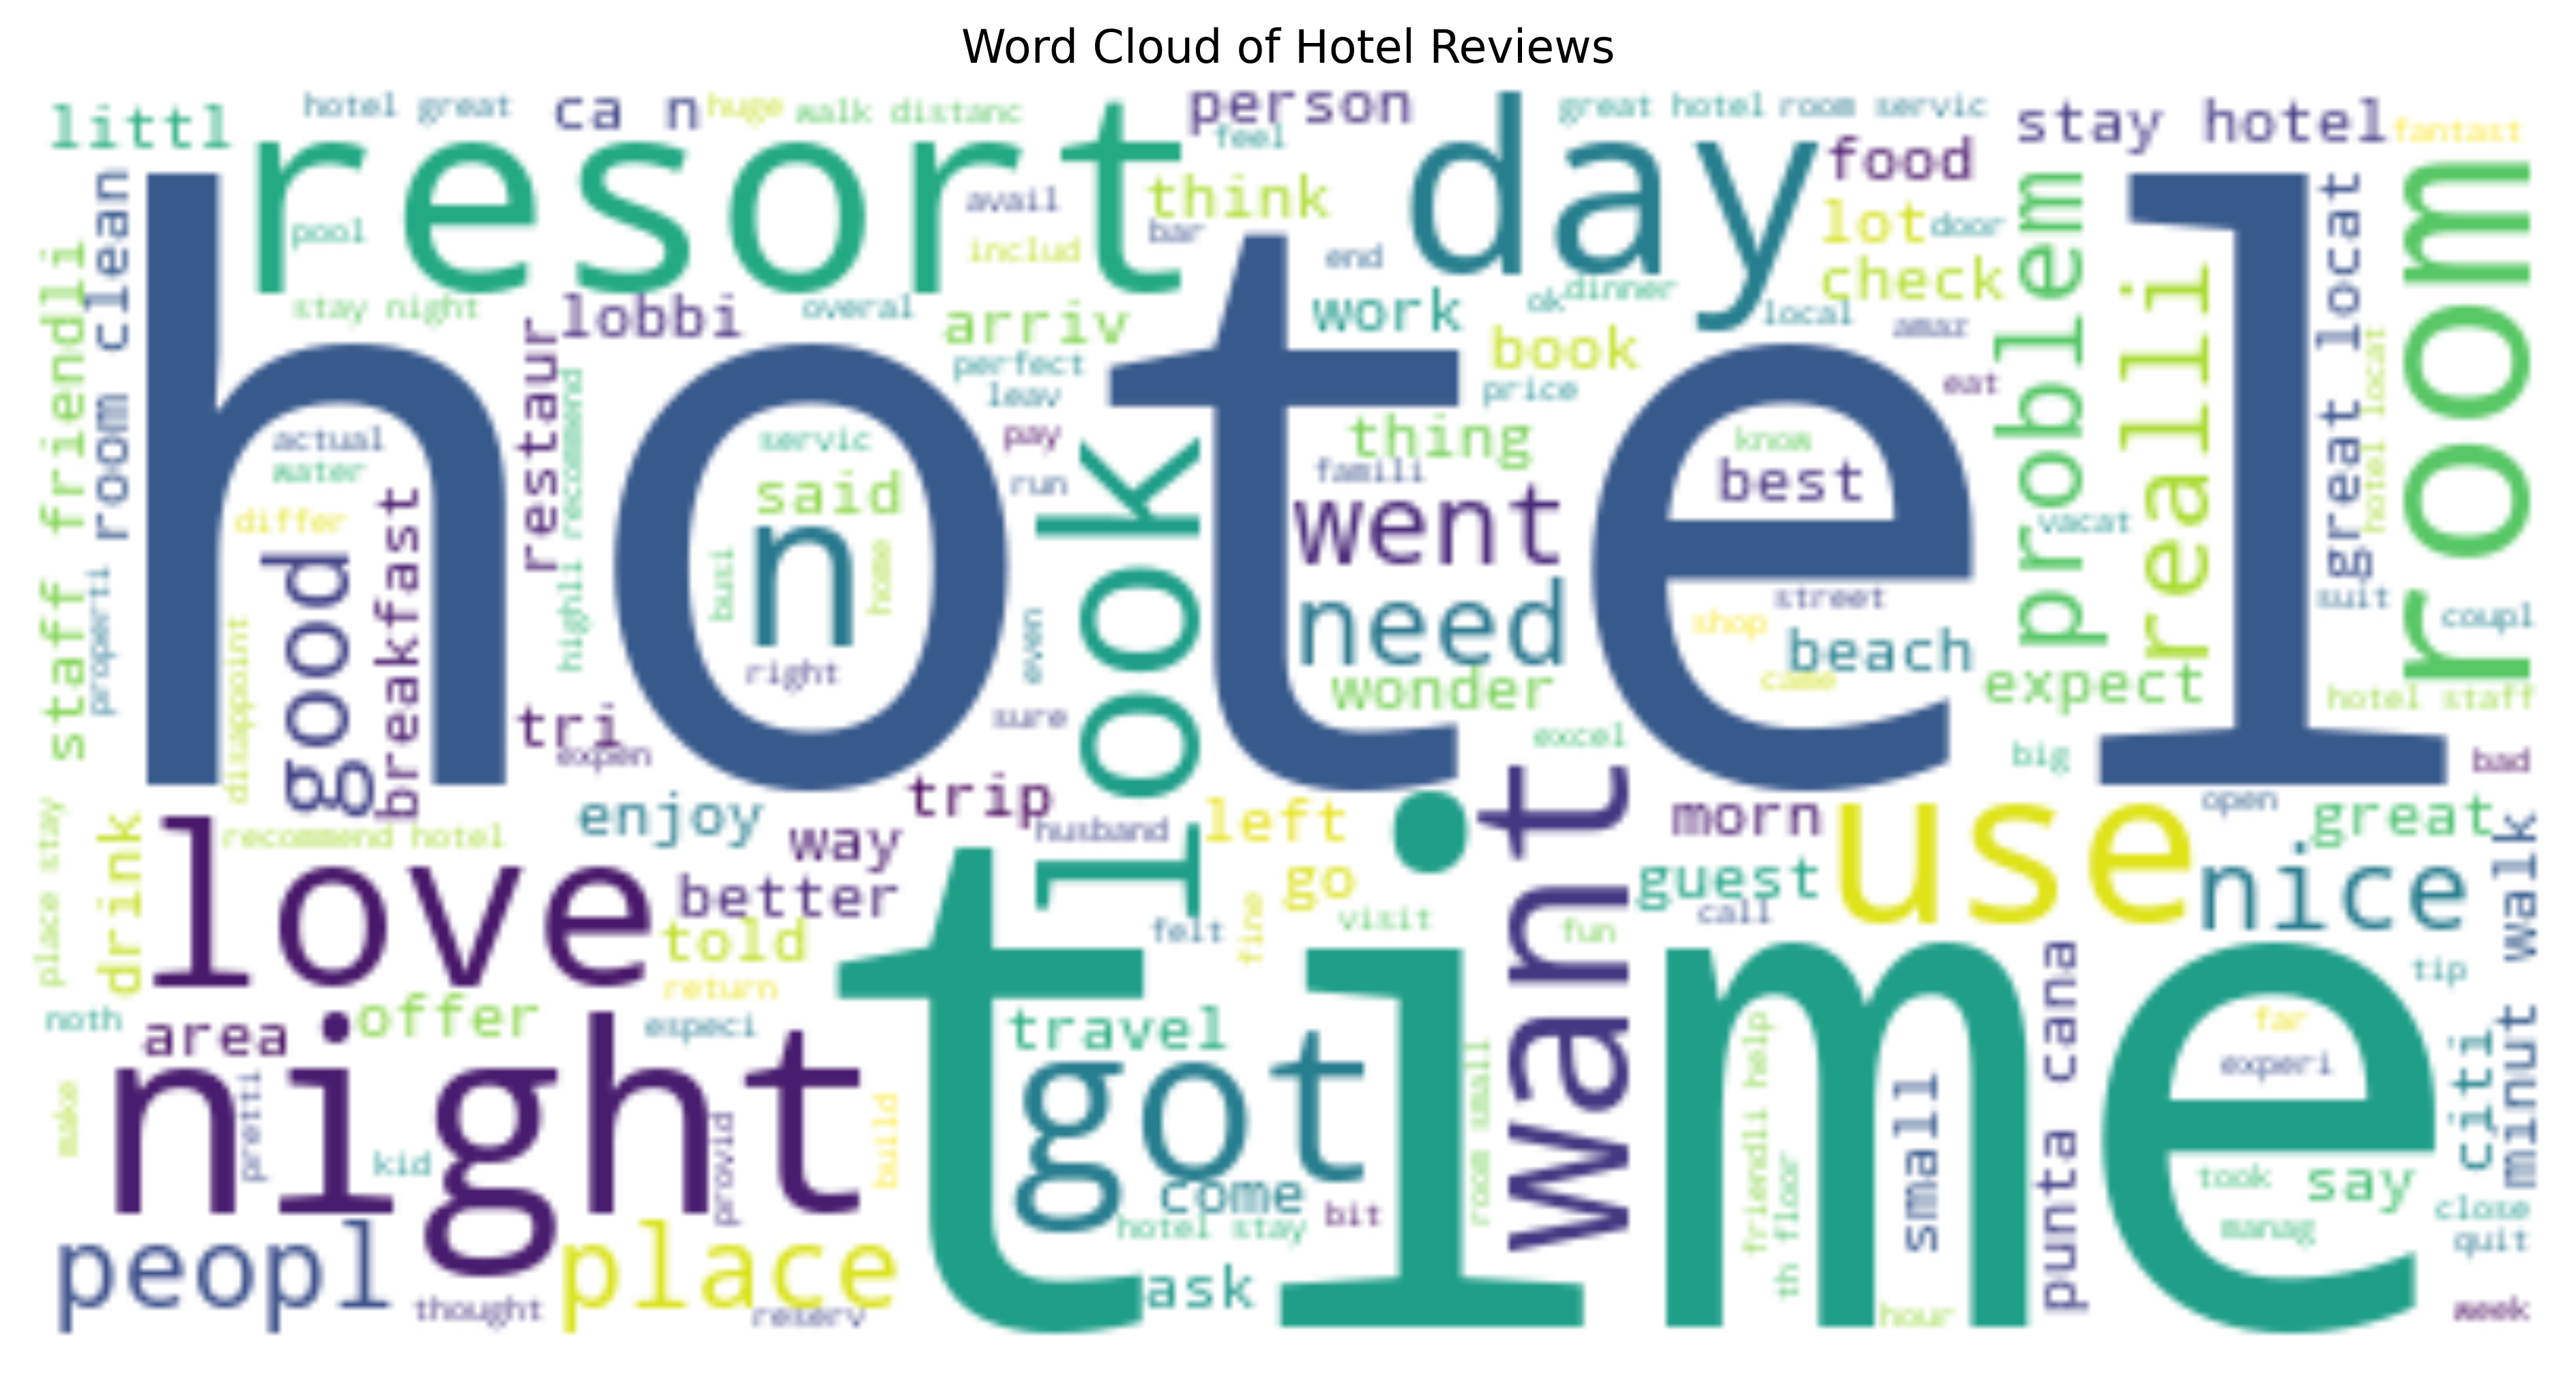

In [19]:
from wordcloud import WordCloud
text = " ".join(data['Cleaned_Review'])
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

plt.figure(figsize=(14,6) , dpi=400)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Hotel Reviews")
plt.show()

#### Convert text data into numerical format using TF-IDF (Term Frequency-Inverse Document Frequency).

In [20]:
# import library 
from sklearn.feature_extraction.text import TfidfVectorizer
# Transforming text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)


# Sparate the dataset 
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment_Encoded']


In [21]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [22]:
# Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Train and evaluate logistic regression model
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.8631661136053094
              precision    recall  f1-score   support

    negative       0.80      0.78      0.79       795
     neutral       0.49      0.20      0.28       541
    positive       0.90      0.97      0.93      3787

    accuracy                           0.86      5123
   macro avg       0.73      0.65      0.67      5123
weighted avg       0.84      0.86      0.84      5123



In [24]:
# Train and evaluate Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.8124146008198321
              precision    recall  f1-score   support

    negative       0.87      0.49      0.63       795
     neutral       1.00      0.01      0.01       541
    positive       0.81      1.00      0.89      3787

    accuracy                           0.81      5123
   macro avg       0.89      0.50      0.51      5123
weighted avg       0.84      0.81      0.76      5123



In [25]:
# Train and evaluate Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

Naive Bayes Accuracy: 0.8194417333593598
              precision    recall  f1-score   support

    negative       0.86      0.54      0.66       795
     neutral       0.00      0.00      0.00       541
    positive       0.81      1.00      0.90      3787

    accuracy                           0.82      5123
   macro avg       0.56      0.51      0.52      5123
weighted avg       0.74      0.82      0.77      5123



c:\Users\praja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\praja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\praja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [26]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_svmpred = model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_svmpred))
print(classification_report(y_test, y_svmpred, target_names=label_encoder.classes_))


SVM Accuracy: 0.852039820417724
              precision    recall  f1-score   support

    negative       0.76      0.77      0.76       795
     neutral       0.42      0.24      0.30       541
    positive       0.91      0.96      0.93      3787

    accuracy                           0.85      5123
   macro avg       0.69      0.66      0.67      5123
weighted avg       0.83      0.85      0.84      5123



In [27]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save TF-IDF Vectorizer
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)
